In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
glass_df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv', header = None)
glass_df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass_df.tail(4)

,0,1,2,3,4,5,6,7,8,9,10
210,211,1.51685,14.92,0.0,1.99,73.06,0.0,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.0,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.0,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.0,8.62,1.67,0.0,7


In [6]:
glass_df.shape


(214, 11)

In [7]:
headings = ['ID','RI','NA','Mg', 'Al','Si','K','Ca','Ba','Fe','Glass_type']
glass_df.columns = headings
glass_df.head()

,ID,RI,NA,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
glass_df.columns

Index(['ID', 'RI', 'NA', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Glass_type'],
      dtype='object')

In [9]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          214 non-null    int64  
 1   RI          214 non-null    float64
 2   NA          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  Glass_type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [10]:
glass_df.isnull().sum()

ID            0
RI            0
NA            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Glass_type    0
dtype: int64

In [11]:
glass_df.isnull().sum().sum()

0

In [12]:
glass_df['Glass_type'].value_counts()

Glass_type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

Text(0.5, 1.0, 'Glass Type Counts')

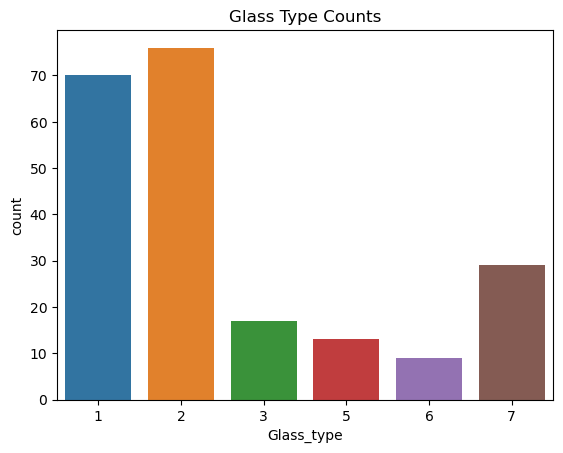

In [13]:
sns.countplot(x='Glass_type',data = glass_df)
plt.title('Glass Type Counts')

In [14]:
glass_df.describe()

,ID,RI,NA,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [15]:
glass_df = glass_df.drop('ID', axis = 1)

In [16]:
glass_df.head(4)

,RI,NA,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1


In [17]:
features = ['RI','NA','Mg', 'Al','Si','K','Ca','Ba','Fe']
label = ['Glass_type']

X = glass_df[features]
Y = glass_df[label]

In [18]:
X.shape

(214, 9)

In [19]:
type(X)

pandas.core.frame.DataFrame

In [20]:
Y.shape

(214, 1)

In [21]:
type(Y)

pandas.core.frame.DataFrame

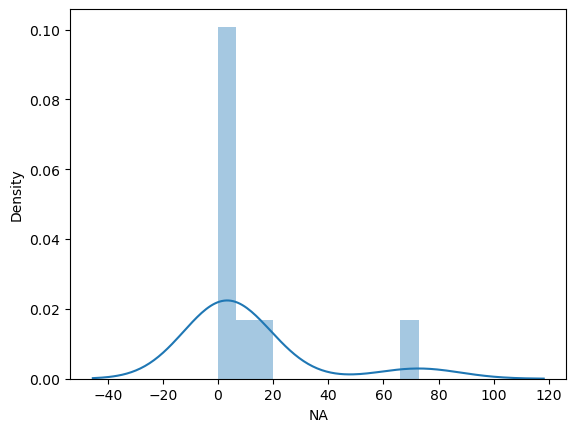

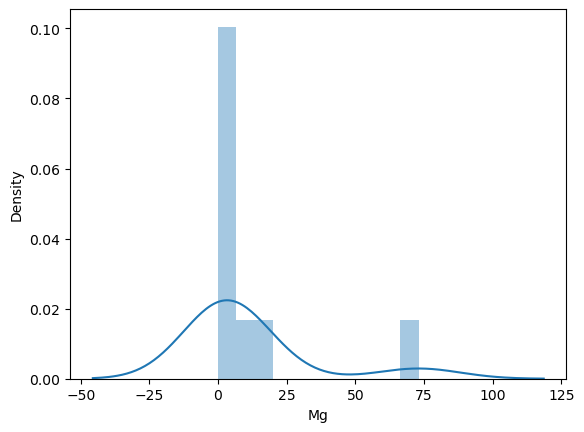

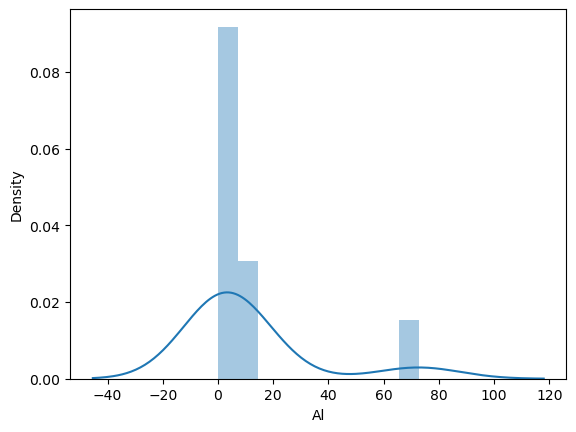

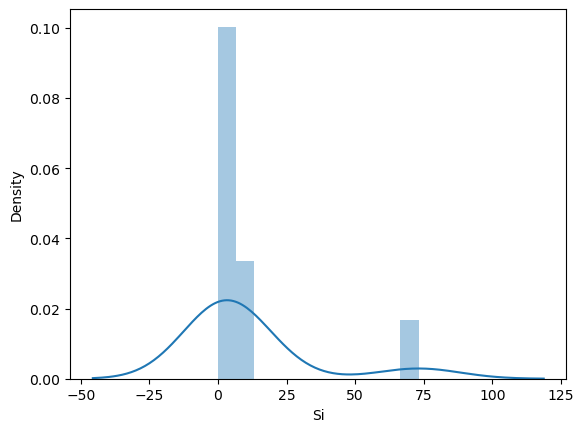

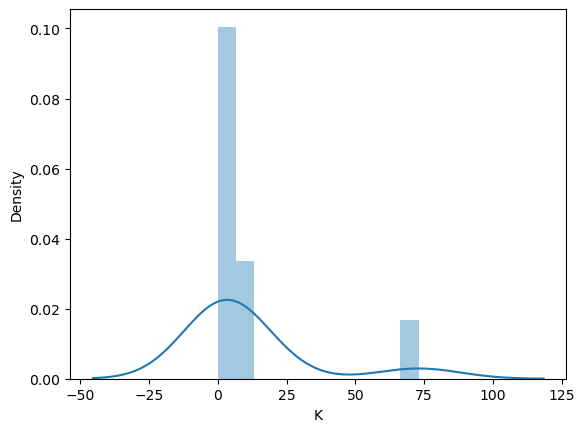

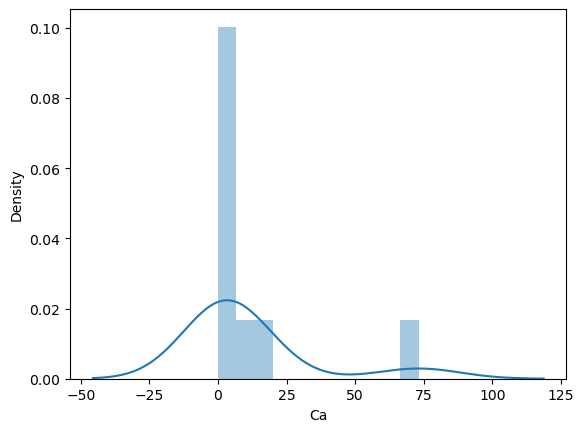

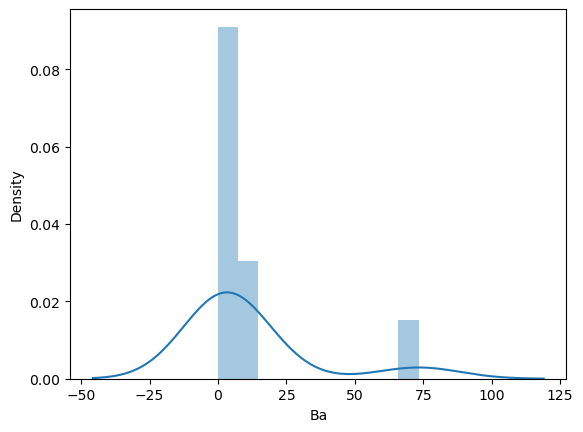

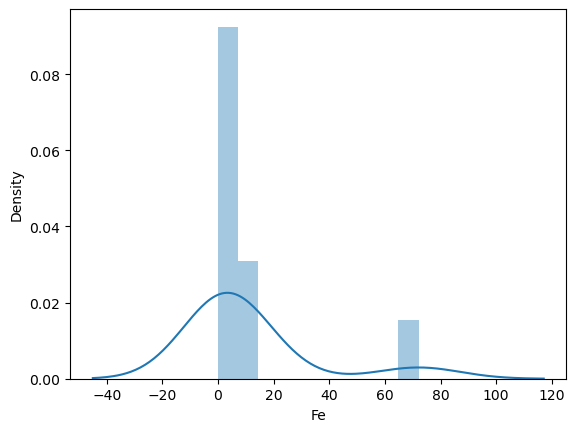

In [22]:
x1 = X.values

for i in range(1,9):
    sns.distplot(x1[i])
    plt.xlabel(features[i])
    plt.show()

<Figure size 1000x1000 with 0 Axes>

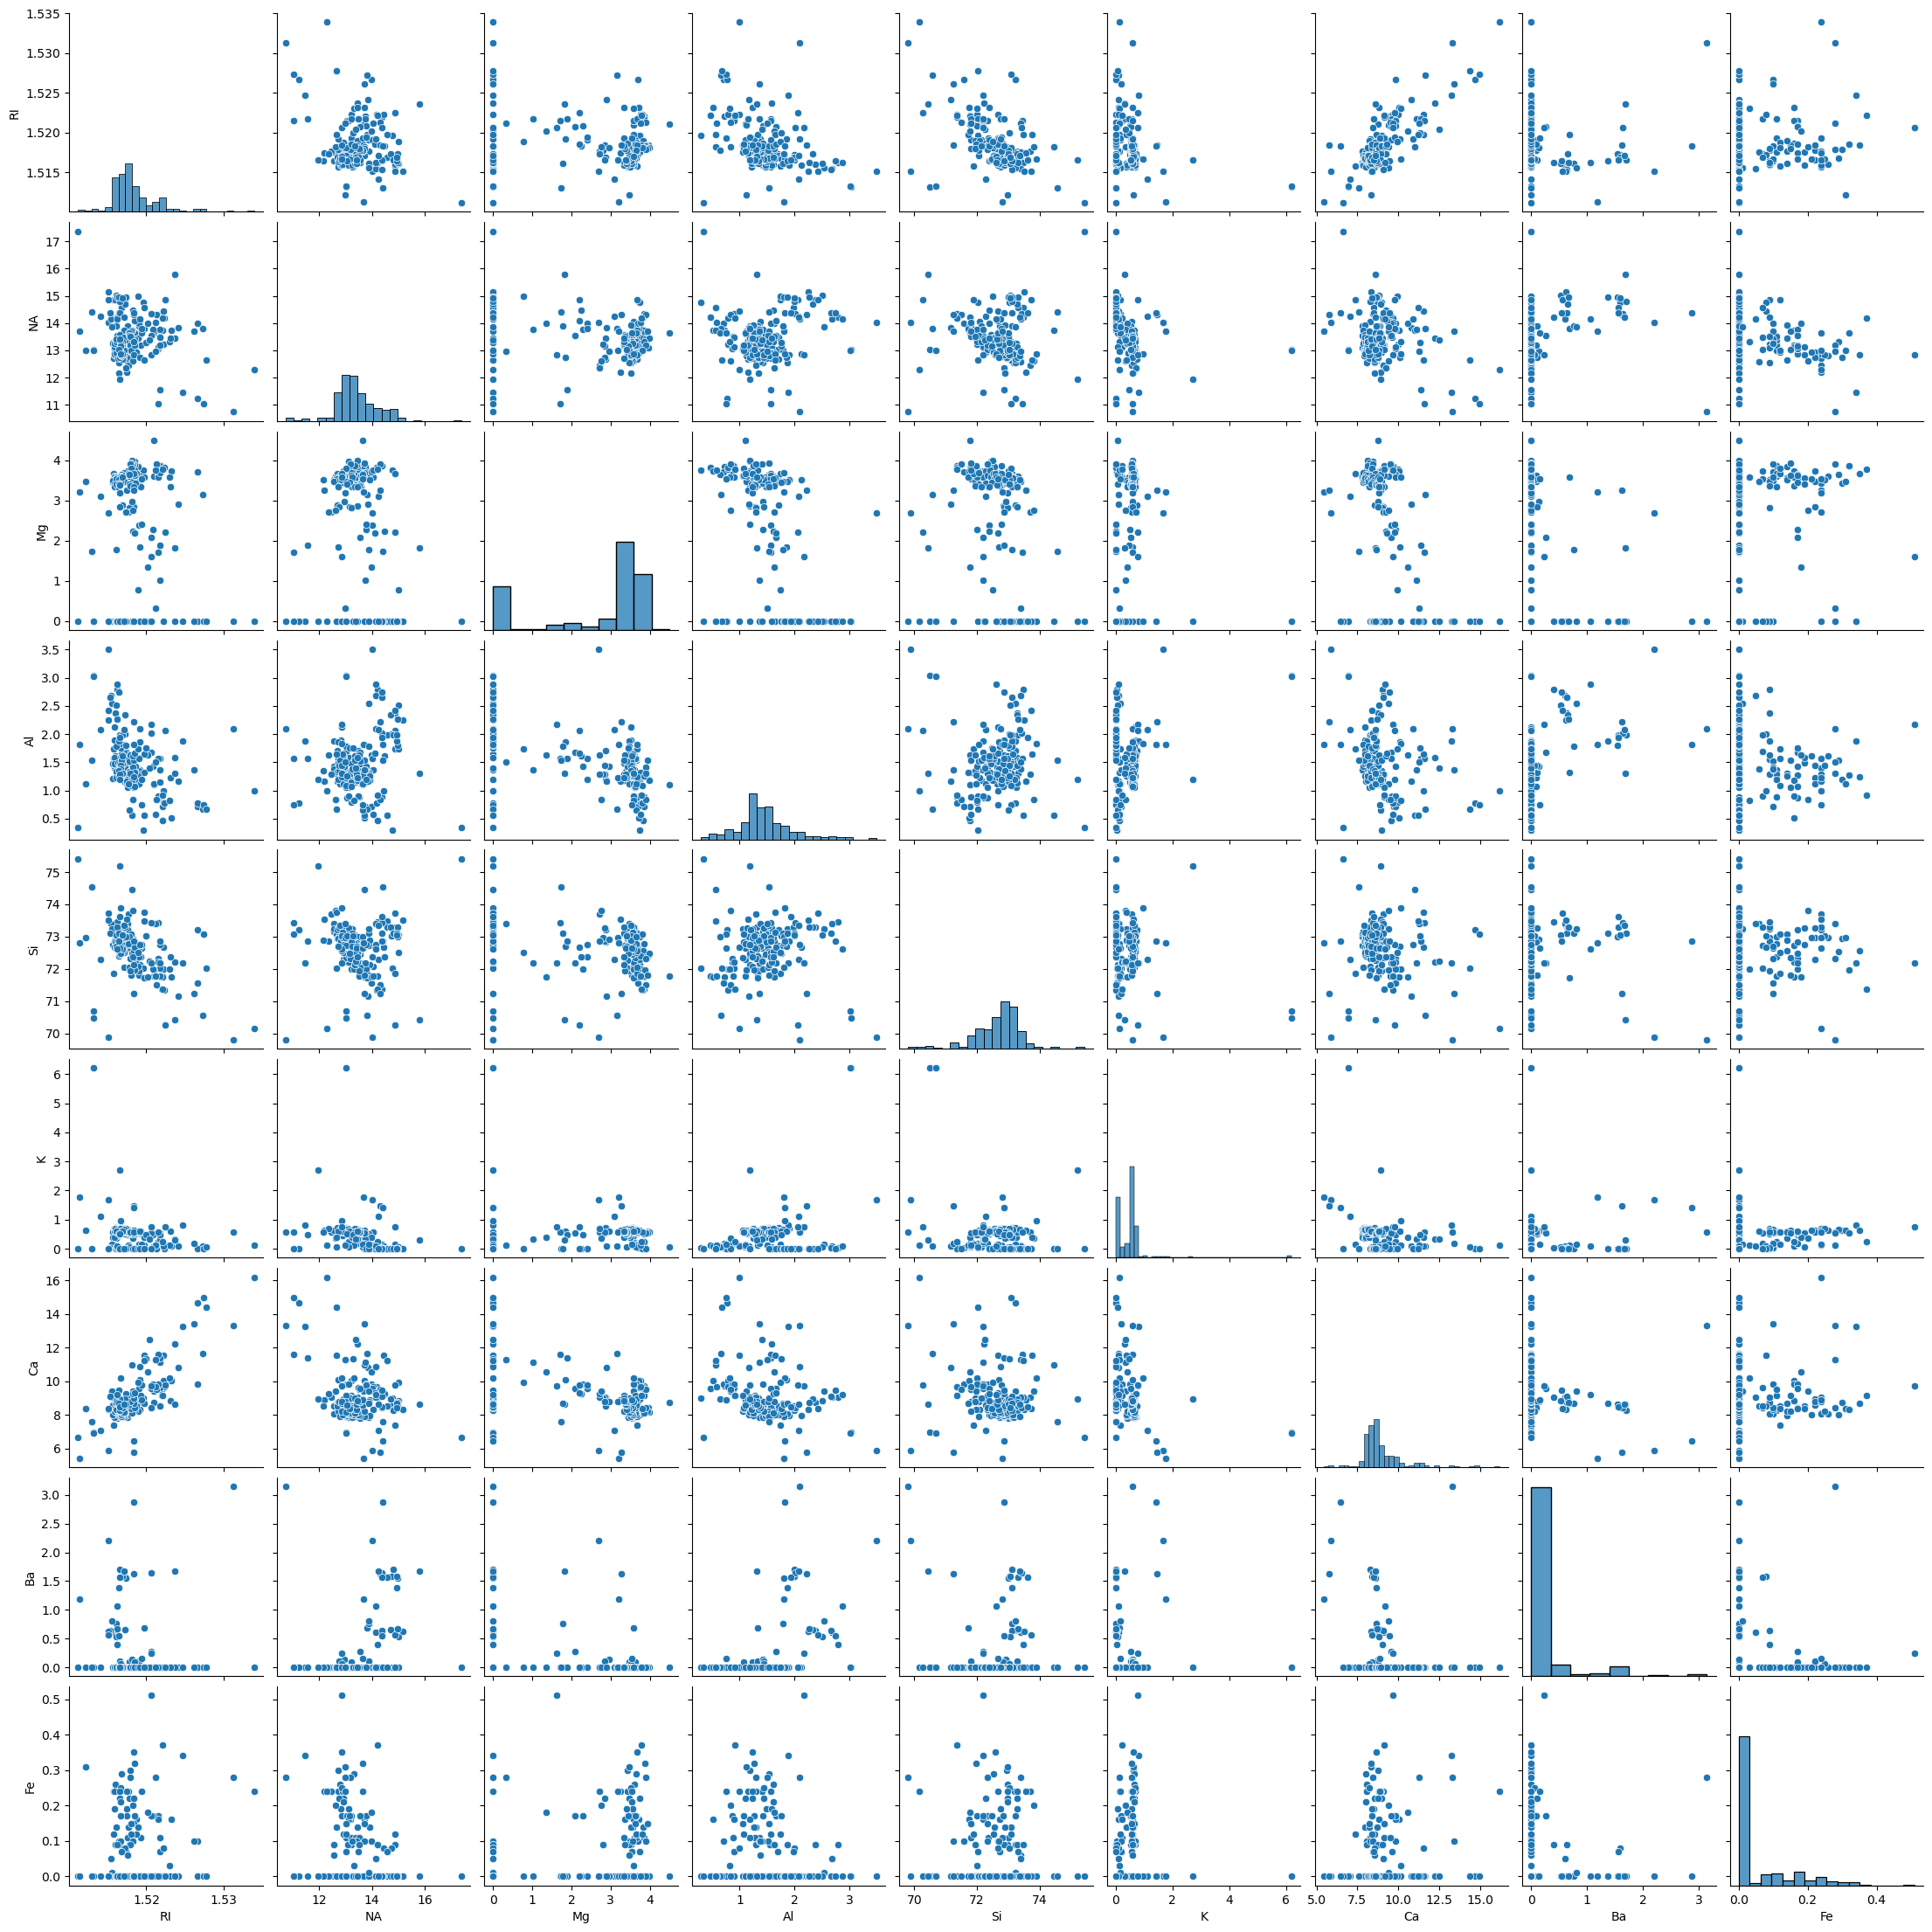

In [23]:
x1 = pd.DataFrame(X)
plt.figure(figsize=(10,10))
sns.pairplot(data = x1)
plt.show()

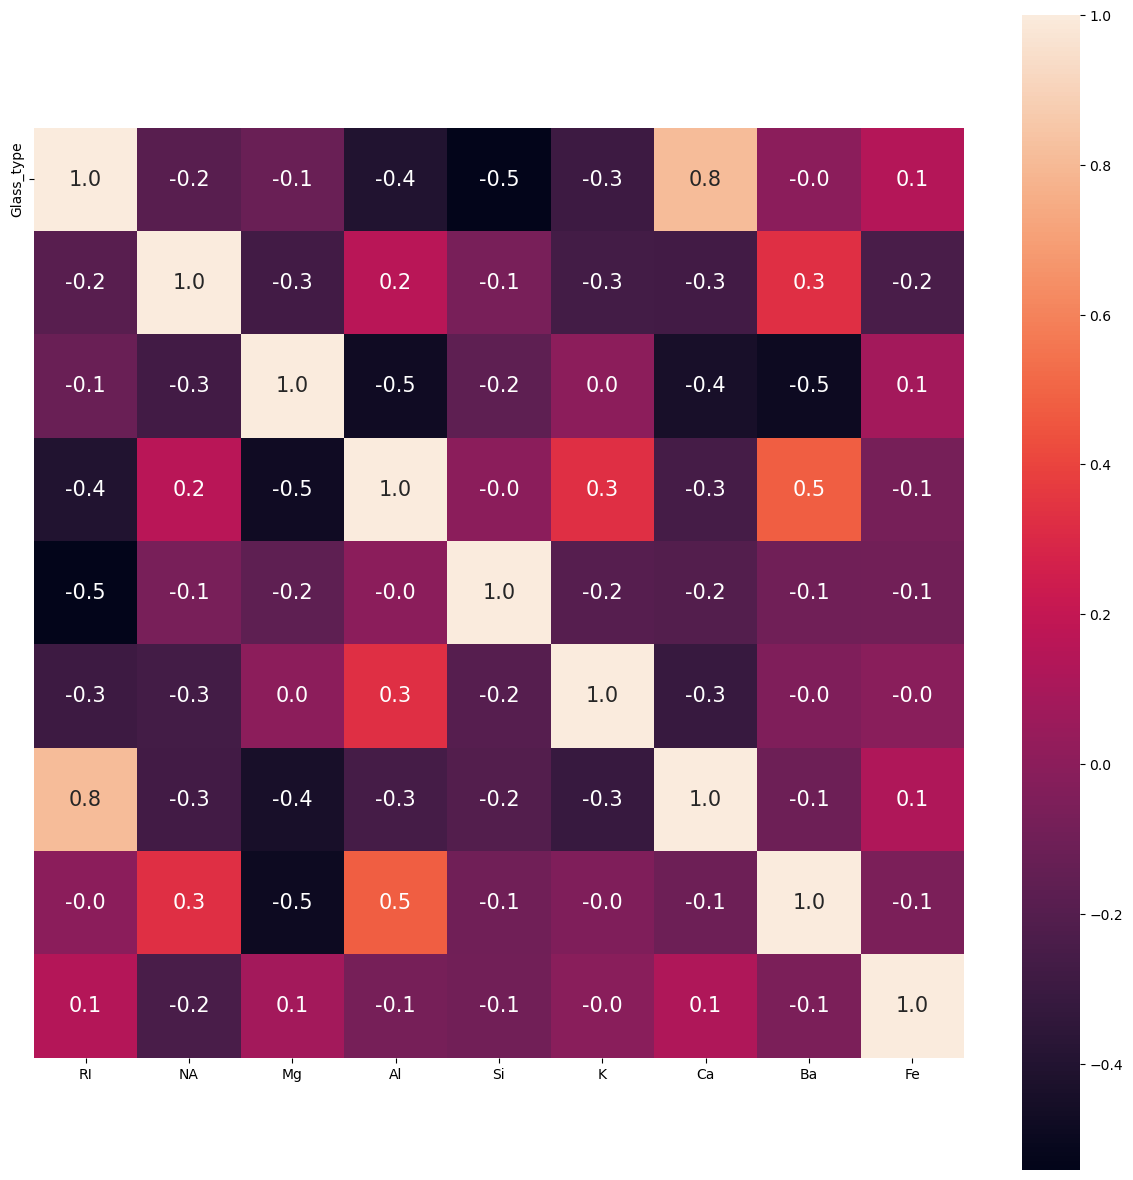

In [24]:
coreleation = X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar = True,square = True,annot = True, fmt='.1f',annot_kws={'size':15},xticklabels = features,yticklabels = label)
plt.show()

In [25]:
scaler = MinMaxScaler()

In [26]:
X.head(2)

,RI,NA,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [27]:
Y.tail(2)

,Glass_type
212,7
213,7


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0,stratify = Y)

In [29]:
Y_train = Y_train.values.ravel()
Y_test = Y_test.values.ravel()

In [30]:
print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of Y_train = ' + str(Y_train.shape))
print('Shape of Y_test = ' + str(Y_test.shape))

Shape of X_train = (160, 9)
Shape of X_test = (54, 9)
Shape of Y_train = (160,)
Shape of Y_test = (54,)


In [31]:
Scores = []

for i in range(1):
    tree = DecisionTreeClassifier(random_state = 0)
    tree.fit(X_train, Y_train)
    score = tree.score(X_test, Y_test)
    Scores.append(score)
    
print(tree.score(X_train, Y_train))
print(Scores)

1.0
[0.7037037037037037]
